## GridSearchCV and RandomsearchCV implementation to find the best hyperparameter (K) in K-NN :





In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np

# Data is generated using make_classification module from sklearn datasets.
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

### GridSearchCV Implementation without SKlearn:

In [8]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score
def randomly_select_60_percent_indices_in_range_from_1_to_len(x_train):
    return random.sample(range(0, len(x_train)), int(0.6*len(x_train)))

def GridSearch(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in tqdm(params['n_neighbors']): # params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds): # folds = 3  ie, j takes values b/t 0,1,2
            # check this out: https://stackoverflow.com/a/9755548/4084039
            train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(x_train) # randomly pick 60% data from xtrain
            test_indices  = list(set(list(range(1, len(x_train)))) - set(train_indices)) # other than train_indices

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k 
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

100%|██████████| 11/11 [00:07<00:00,  1.39it/s]


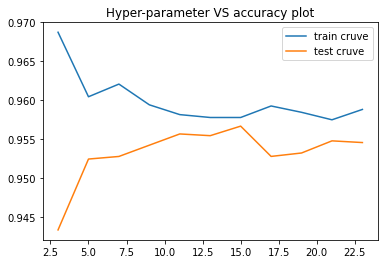

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
folds = 3

trainscores,testscores = GridSearch(X_train, y_train, neigh, params, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [11]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

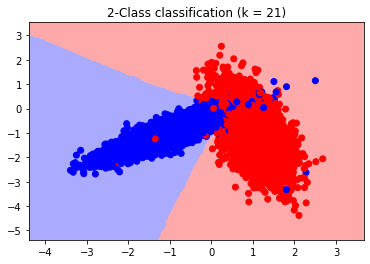

In [12]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

### RandomsearchCV implementation Without SKlearn:


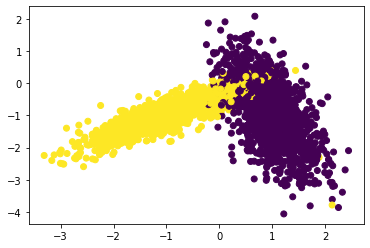

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

We are implementing custom RandomsearchCV :

in Gridsearch model trained the data with all hyperparameter (in case  knn k - 1,3,5,7,9,etc) and Random Search select hyper parameter randomly.

Implementation:

In this section i should only care about the random generation of the hyperparameter.

Apart, from that everything should be same.

In [3]:
def random_params_range_1_to_len(params_range):
    sort_values = random.sample(range(1, params_range),10)
    sort_values.sort()
    return sort_values

In [4]:

def RandomSearch(x_train, y_train, classifier, params, folds):
    trainscores = []
    testscores  = [] 
    
    #Randomly selected numbers from params_range
    params_list= random_params_range_1_to_len(params_range)
    #printing the random paramter values
    print(params_list)
    
    params = {'n_neighbors': params_list}
    
    for k in tqdm(params['n_neighbors']):
        
        trainscores_folds = []
        testscores_folds  = []
        
        for j in range(0, folds): #fold = [1,2,3]
            #formulae for finding length
            Values = (len(x_train)/ (folds))
            #covert into integer values
            boundary = int(Values)
            
            
            test_indices=list(set(list(range((boundary*j), (boundary*(j+1))))))
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))
            # selecting the data points based on the train_indices and test_indices
            
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params

In [5]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score

def RandomSearch(x_train,y_train,classifier, params, folds): # GridSearch(X_train, y_train, neigh, params, folds)
    trainscores = []
    testscores  = [] 
    params_list= random_params_range_1_to_len(params_range)
    print(params_list)
    params = {'n_neighbors': params_list}

    X_Tr1 = x_train[0:int(len(x_train)/3) , : ]
    X_Tr2 = x_train[int(len(x_train)/3):int(2*len(x_train)/3), : ]
    X_Tr3 = x_train[int(2*len(x_train)/3):int(3*len(x_train)/3), : ] 

    y_tr1 = y_train[0:int(len(y_train)/3) ]
    y_tr2 = y_train[int(len(y_train)/3):int(2*len(y_train)/3)]
    y_tr3 = y_train[int(2*len(y_train)/3):int(3*len(y_train)/3) ]    
    for k in tqdm(params['n_neighbors']): # for different values of k
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            if j==0:
              X_Tr = np.r_[X_Tr1,X_Tr2]
              X_Cv = X_Tr3
              y_Tr = np.r_[y_tr1,y_tr2]
              y_Cv = y_tr3

            elif j==1:
              X_Tr = np.r_[X_Tr1,X_Tr3]
              X_Cv = X_Tr2
              y_Tr = np.r_[y_tr1,y_tr3]
              y_Cv = y_tr2
            
            else :
              X_Tr = np.r_[X_Tr2,X_Tr3]
              X_Cv = X_Tr1
              y_Tr = np.r_[y_tr2,y_tr3]
              y_Cv = y_tr1

            classifier.n_neighbors = k # here k takes values from list of dictionary params['n_neighbors']
            # neigh = KNeighborsClassifier() and here classifier = neigh, which implies that classifier is KneighborsClassifier()
            classifier.fit(X_Tr,y_Tr) # fitting on Train dataset

            Y_predicted = classifier.predict(X_Cv) # Y_prediction(using, X_cv) on X_cv dataset. And X_cv and y_cv is not seen in fit.
            testscores_folds.append(accuracy_score(y_Cv, Y_predicted)) # accuracy using ie, (Y_cv,Y_pred using X_CV)

            Y_predicted = classifier.predict(X_Tr) # Y_prediction(ie, Y_train) on X_train dataset. 
                                                      # Here y_train is already seen during fitting of X_train,Y_train. 
            trainscores_folds.append(accuracy_score(y_Tr, Y_predicted)) # accuracy using ie, (Y_train,Y_pred using X_Train)
        trainscores.append(np.mean(np.array(trainscores_folds))) # mean of acc1,acc2,acc3 using X_train
        testscores.append(np.mean(np.array(testscores_folds))) # mean of acc4,acc5,acc6 using X_CV
    return trainscores,testscores,params # returing the average accuracy score using X_train and avg accuracy score using X_CV
# plot of trainscores and different values of k
# plot of testscores and different values of k

  0%|          | 0/10 [00:00<?, ?it/s]

[2, 3, 5, 11, 15, 17, 18, 21, 33, 40]


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


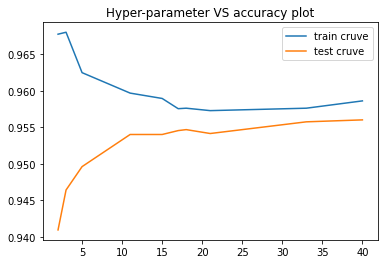

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier() # creating an object of class KNeighborsClassifier()

params_range = 50 # params takes list of different values of K
# random.randint : discrete uniform distribution

folds = 3 # the number of folds.

trainscores,testscores,params = RandomSearch(X_train, y_train, neigh, params_range, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()